# 机器学习练习 2 - 逻辑回归

在这一次练习中，我们将要实现逻辑回归并且应用到一个分类任务。我们还将通过将正则化加入训练算法，来提高算法的鲁棒性，并用更复杂的情形来测试它。

## 逻辑回归

本次的任务是：  
我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。
设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。
现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。

数据可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path , header=None , names=['Exam 1' , 'Exam 2' , 'Admitted'] )
data.head()


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


用散点图直观的观察一下数据

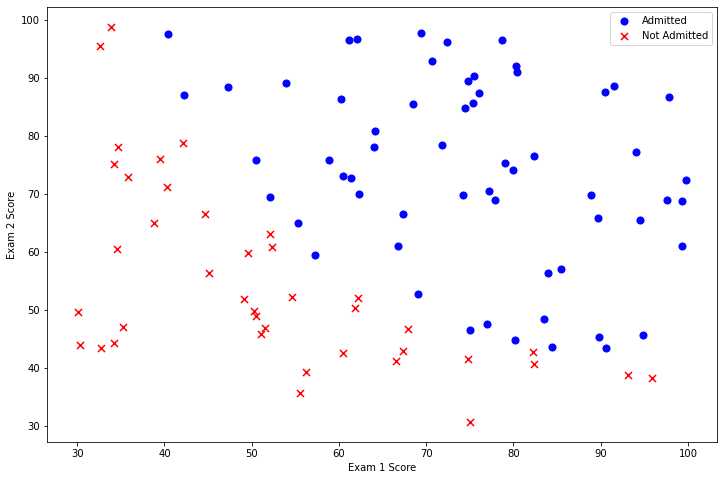

In [3]:
positive = data[ data['Admitted'].isin( [1] ) ]
negative = data[ data['Admitted'].isin( [0] ) ]

fig , ax = plt.subplots(figsize = (12,8) )

ax.scatter( positive['Exam 1'] , positive['Exam 2'] , s=50 , c='b' , marker = 'o' , label = 'Admitted')
ax.scatter( negative['Exam 1'] , negative['Exam 2'] , s=50 , c='r' , marker = 'x' , label = 'Not Admitted')
ax.legend()

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

plt.show()




可以看出，是有一个相对清晰的边界的

# sigmoid 函数
逻辑回归函数为
$$
h_\theta=g(\theta^Tx)
$$
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
    
当然也有其他类似的函数，这里我们用上面这种  
下面我们实现它

In [4]:
def sigmoid(z): 
    return 1/(1+ np.exp(-z) )

验证一下我们的sigmoid函数

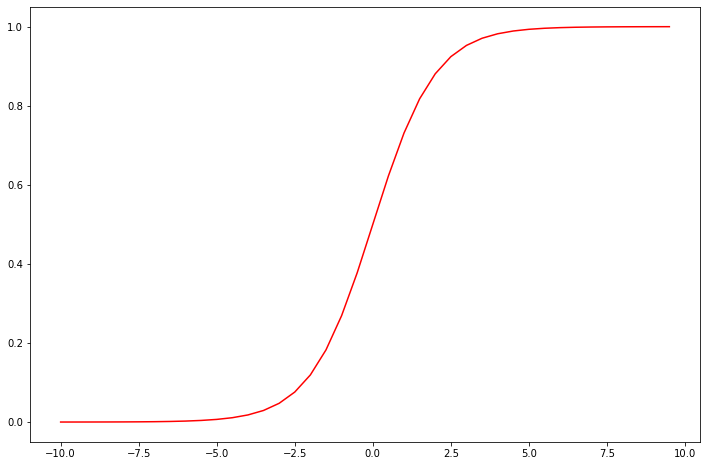

In [5]:
nums = np.arange(-10 , 10 , step = 0.5)

fig , ax = plt.subplots( figsize = (12,8) )

ax.plot( nums , sigmoid(nums) , 'r' )

plt.show()


好的，运行无误   
现在，我们需要编写代价函数来评估结果。 
代价函数：
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [6]:
def cost(theta , X , y): 
    theta = np.matrix(theta)
    
    X = np.matrix(X) 
    y = np.matrix(y)
    
    first = np.multiply(-y , np.log( sigmoid(X * theta.T) ))
    second = np.multiply( (1-y) , np.log(1- sigmoid(X * theta.T)  ) )
    
    return np.sum(first-second)/len(X)
    

下面进行数据的处理，与上一个练习相似

In [7]:
# 加一列常数列  用于向量化处理
data.insert(0 , 'Ones' , 1)

# 初始化X，y，θ
clos = data.shape[1]
X = data.iloc[ : , 0:clos-1 ]
y = data.iloc[ : , clos-1:clos ]

X = np.array(X)
y = np.array(y)
theta = np.zeros(3)


检查矩阵维度

In [8]:
theta

array([0., 0., 0.])

In [9]:
X.shape , theta.shape , y.shape

((100, 3), (3,), (100, 1))

查看初始代价

In [10]:
cost(theta , X , y)

0.6931471805599453

# gradient descent(梯度下降)  
* 向量化计算为 ： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

虽然这个梯度和前面线性回归的梯度很像，但是$h_\theta(x)$是不一样的
实现。   
具体求导过程在课程视频里面有讲

In [11]:
def gradient(theta , X , y): 
    # 只是计算梯度
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int( theta.ravel().shape[1] )
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    
    for i in range(parameters): 
        term = np.multiply(error , X[ : ,i])
        
        grad[i] = np.sum(term)/len(y)
        
    return grad


注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，所以，我们可以用SciPy的“optimize”命名空间来做同样的事情。这样我们就不用去自己写梯度下降，库函数自己找到合适的迭代次数和步长，并反馈给我们最优解  
（另外，如果对fminunc有疑问的，可以参考下面这篇百度文库的内容https://wenku.baidu.com/view/2f6ce65d0b1c59eef8c7b47a.html ）

In [12]:
gradient( theta , X , y )

array([ -0.1       , -12.00921659, -11.26284221])

使用SciPy's truncated newton（TNC）寻找最优解

In [13]:

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost , x0=theta , fprime=gradient , args=(X , y))
result


(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

看一下计算出的参数的代价是多少

In [14]:
cost(result[0] , X , y)

0.20349770158947458

画出训练得出的决策曲线

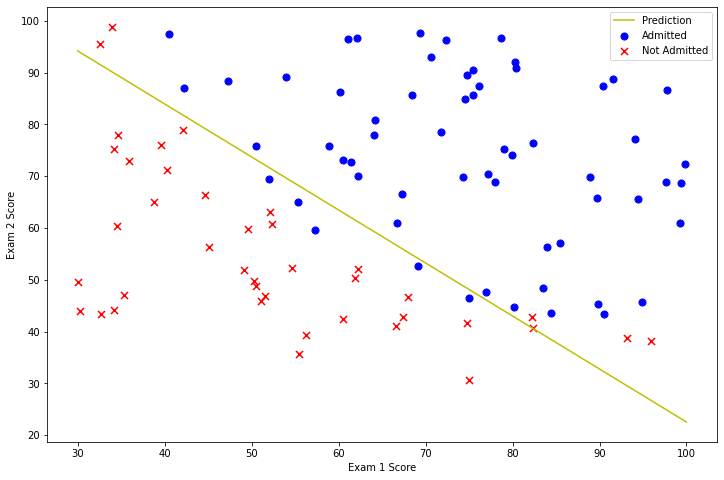

In [15]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

下面我们需要编写一个函数，用我们得到的参数theta为数据集X输出预测。然后，我们可以使用这个函数来给我们训练得到的分类器打分。  
逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
当${{h}_{\theta }}$大于等于0.5时，预测 y=1

当${{h}_{\theta }}$小于0.5时，预测 y=0 。  
也可以试试别的值，一般我们都使用0.5

In [16]:
# 预测函数
def predict(theta , X): 
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]
    

In [17]:
theta_min = np.matrix(result[0]) 
predictions = predict(theta_min , X)
correct = [ 1 if (a == 1 and b==1) or (a==0 and b==0) else 0  for (a,b) in zip(predictions , y )]
accuracy = ( sum( map(int , correct)) % len(correct))

print('accuracy = {0}%'.format(accuracy))


accuracy = 89%


准确率还不错，但是这是在训练集上，我们并没有使用交叉验证集来计算更真实的性能。这个后面会讲到

## 正则化逻辑回归

第二部分，我们将实现加入正则项的逻辑回归算法。  
题目：  
设想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果，测试结果决定是否芯片要被接受或抛弃。你有一些历史数据，可以帮助你构建一个逻辑回归模型。

数据可视化

In [18]:
path = 'ex2data2.txt' 
data2 = pd.read_csv(path , header=None , names=[ 'Test 1' , 'Test 2' , 'Accepted' ] ) 
data2.head()


,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


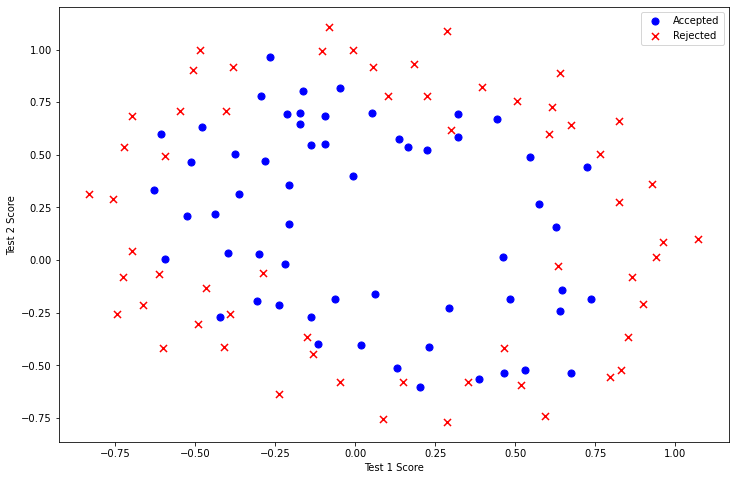

In [20]:
positive2 = data2[ data2['Accepted'].isin([1]) ] 
negative2 = data2[ data2['Accepted'].isin([0]) ] 
fig , ax = plt.subplots( figsize=(12,8) ) 
ax.scatter( positive2['Test 1'] , positive2['Test 2'] , s=50 , c='b' , marker='o' , label='Accepted' ) 
ax.scatter( negative2['Test 1'] , negative2['Test 2'] , s=50 , c='r' , marker='x' , label='Rejected' )
ax.legend()
ax.set_xlabel('Test 1 Score') 
ax.set_ylabel('Test 2 Score') 
plt.show()


可以看到，这次的数据没有线性边界，多以，我们尝试构建多项式特征

构建一组多项式特征

In [21]:
degree = 5
x1 = data2['Test 1'] 
x2 = data2['Test 2']

data2.insert(3, 'Ones' , 1)

for i in range(1 , degree): 
    for j in range(0 , i): 
        data2['F' + str(i) + str(j)] = np.power(x1 , i-j) * np.power(x2 , j)  

data2.drop('Test 1' , axis=1 , inplace=True)
data2.drop('Test 2' , axis=1 , inplace=True) 

data2.head()

# Fab 表示x1的(a-b)次幂 乘以 x2的(b)次幂

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


现在，编写包含正则化项的代价函数  
# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [22]:
# 包含正则化项
def costReg(theta , X , y , learningRate): 
    theta = np.matrix(theta) 
    X = np.matrix(X) 
    y = np.matrix(y) 
    first = np.multiply( -y , np.log( sigmoid(X * theta.T)))
    second = np.multiply( (1-y) , np.log(1-sigmoid(X * theta.T ) ) ) 
    reg = (learningRate/( 2 * len(X) ) ) * np.sum( np.power( theta[: , 1:theta.shape[1]], 2 ) ) 
    
    return np.sum( first-second ) / len(X) + reg

    


请注意等式中的"reg" 项。以及另外的一个“学习率”参数。这都是一种**超参数**，用来控制正则化项。

# regularized gradient descent(正则化梯度下降)  
因为我们未对${{\theta }_{0}}$ 进行正则化  
所以  
记住$\theta_0$是不需要正则化的，下标从1开始。
梯度的第j个元素的更新公式为：
$$
{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}}
 $$
$$
{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}}
 $$
 对于上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
$$
{{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}
$$

In [23]:
# 包含正则化项的梯度下降
def gradientReg( theta , X , y , learningRate ): 
    theta = np.matrix(theta) 
    X = np.matrix(X) 
    y = np.matrix(y) 
    
    parameters = int( theta.ravel().shape[1] )
    grad = np.zeros(parameters)
    
    error = sigmoid( X * theta.T ) - y
    
    for i in range(parameters): 
        term = np.multiply(error , X[: , i])
        
        if ( i==0 ): 
            grad[i] = np.sum(term) / len(X)
        else: 
            grad[i] = (np.sum(term) ) / len(X) + ( learningRate / len(X) * theta[: , i] )
    
    return grad



In [24]:
data2.shape

(118, 12)

初始化数据

In [25]:
cols = data2.shape[1]
X2 = data2.iloc[: , 1:cols]
y2 = data2.iloc[: , 0:1]

X2 = np.array(X2)
y2 = np.array(y2)

theta2 = np.zeros(11) # 初始theta 为0

In [26]:
X2.shape

(118, 11)

初始化学习率为1，也可以尝试下别的值，

In [27]:
learningRate = 1

测试costReg

In [28]:
costReg(theta2 , X2 , y2 , learningRate)

0.6931471805599454

In [29]:
gradientReg(theta2 , X2 , y2 , learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

利用库函数直接求解(和前面一样)

In [30]:
result2 = opt.fmin_tnc(func=costReg , x0=theta2 , fprime=gradientReg , args=(X2 , y2 , learningRate) )
result2


(array([ 0.53010249,  0.29075567, -1.60725763, -0.5821382 ,  0.01781027,
        -0.21329509, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]),
 22,
 1)

利用前面已经定义的预测函数查看我们训练结果的准确度

In [31]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


做出决策曲线

In [32]:
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree):
        for j in range(0, i):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1]
            place+=1
    return temp

In [33]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

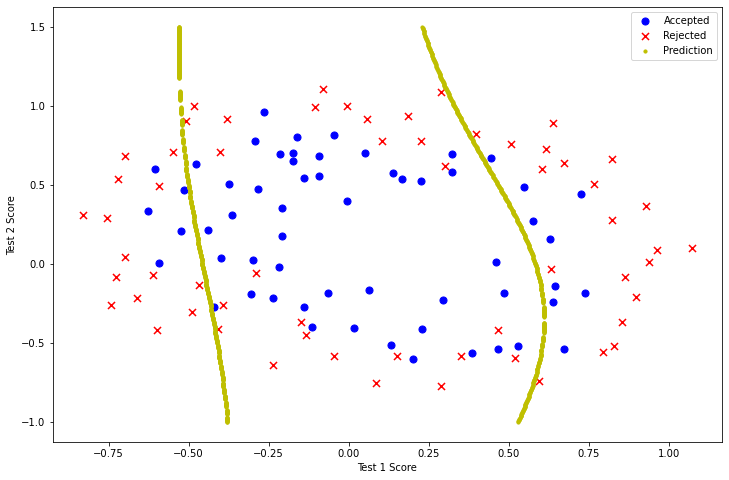

In [34]:

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result2)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

试一试直接调用Python库像scikit-learn

In [35]:
from sklearn import linear_model 
model = linear_model.LogisticRegression(penalty='l2' , C=1.0)
model.fit(X2 , y2.ravel() )


/Users/chenchangming/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
model.score(X2 , y2)

0.6610169491525424

准确率比较低，不过这只是利用函数默认的参数训练得到的。参数是可调的

# 下面我们尝试一下提高多项式的幂数

In [37]:
path = 'ex2data2.txt' 
data2 = pd.read_csv(path , header=None , names=[ 'Test 1' , 'Test 2' , 'Accepted' ] ) 

degree = 6
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree+1):
    for j in range(0, i+1):
        data2['F' + str(i-j) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
#此处原答案错误较多，已经更正

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


处理数据

In [38]:
# 初始化X，y，θ
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]
theta2 = np.zeros(cols-1)

# 进行类型转换
X2 = np.array(X2.values)
y2 = np.array(y2.values)


求解

In [39]:
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result3

(array([ 1.27271026,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516291,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603299, -0.04466178, -0.2777895 , -0.29539513,
        -0.45645982, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]),
 32,
 1)

准确率

In [40]:
theta_min = np.matrix(result3[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 98%


做出决策曲线

In [41]:
def hfunc2(theta, x1, x2):
    temp = theta[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp+= np.power(x1, i-j) * np.power(x2, j) * theta[0][place+1]
            place+=1
    return temp

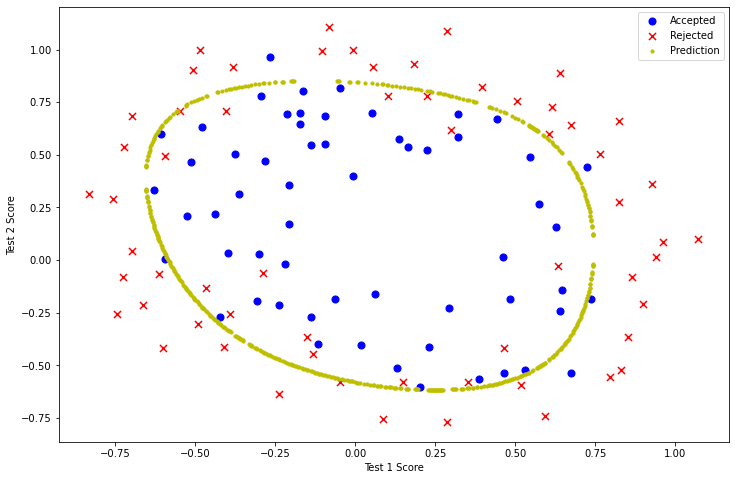

In [42]:

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result3)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

## 我们再来试一试修改λ

$\lambda=0$时过拟合

In [43]:
learningRate2 = 0
result4 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate2))

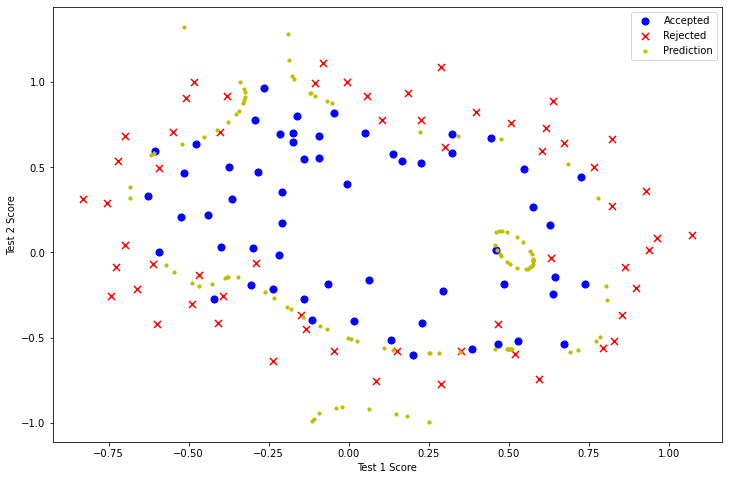

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result4)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()

$\lambda=100$时欠拟合

In [45]:
learningRate3 = 100
result5 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate3))

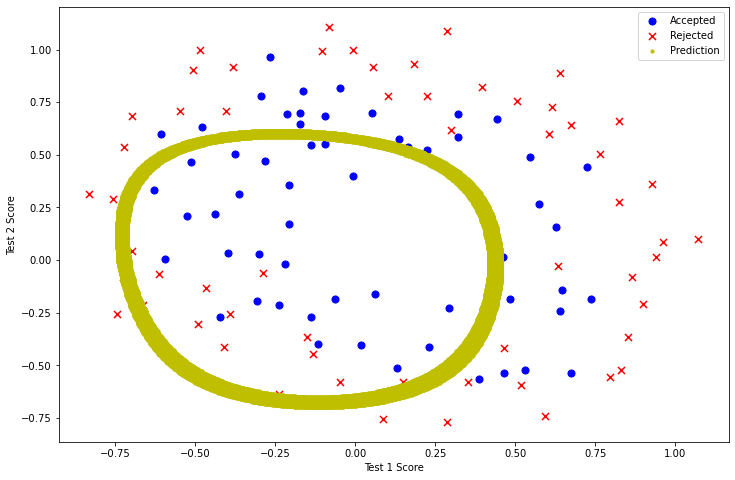

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive2['Test 1'], positive2['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative2['Test 1'], negative2['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

x, y = find_decision_boundary(result5)
plt.scatter(x, y, c='y', s=10, label='Prediction')
ax.legend()
plt.show()